Problem 1: Write a python program to find the polynomials of degrees n= 3,7,15,21 that approximate f(x) = 1/(1+x^2)  from  60 points of this function corresponding to 60 equidistant x  points in the interval [-5,5].  Apply LU,  QR, and SVD methods to find the polynomial approximations.  Draw polynomials from each method and data in the same graph.  Calculate and plan errors for each case. 

Input the library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate 60 equidistant x points in the interval [-5, 5] and 

In [2]:
x = np.linspace(-5, 5, 60)

Calculate the corresponding y values using the function f(x)

In [3]:
y = 1 / (1 - x**2)

Calculate polynomial approximations of degrees n=3,7,15,21

In [2]:
degrees = [3, 7, 15, 21]

Make the vandermonde matrix

In [5]:
def vandermonde(x, n):
    return np.vander(x, n, increasing=True)

Function to calculatethe error

In [6]:
def calculate_error(x, y, coeffs):
    y_fit = np.polyval(coeffs[::-1], x)
    return np.sqrt(np.mean((y - y_fit)**2))

Function about the LU method

In [7]:
def polyfit_LU(x, y, n):
    A = vandermonde(x, n)
    return np.dot(np.linalg.pinv(A), y)

Function about the QR method

In [8]:
def polyfit_QR(x, y, n):
    A = vandermonde(x, n)
    Q, R = np.linalg.qr(A)  # factorize A into Q and R
    c = Q.T @ y  # solve Qc=y for c
    return np.linalg.solve(R, c)  # solve Rx=c for x

Function about the SVD method

In [9]:
def polyfit_SVD(x, y, n):
    # Construct the data matrix A
    A = np.zeros((len(x), n+1))
    for i in range(n+1):
        A[:,i] = x**i
        
        
    # Perform SVD on the data matrix A
    U, s, Vt = np.linalg.svd(A, full_matrices=False)
    
    # Calculate the pseudo-inverse of A using SVD
    S_inv = np.diag(1/s)
    A_pinv = Vt.T @ S_inv @ U.T
    
    # Calculate the polynomial coefficients
    coeffs = A_pinv @ y
    
    return coeffs

Make the calculate and print the plots

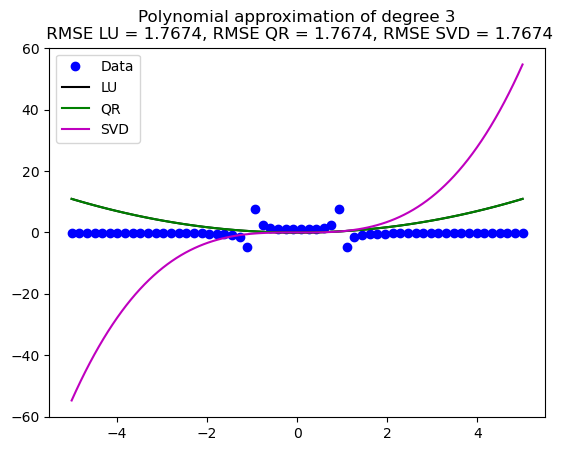

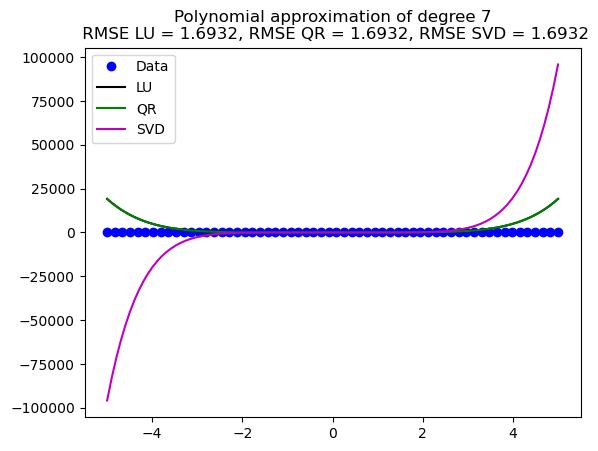

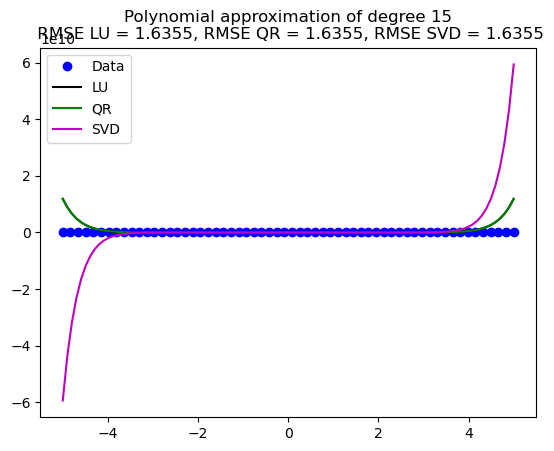

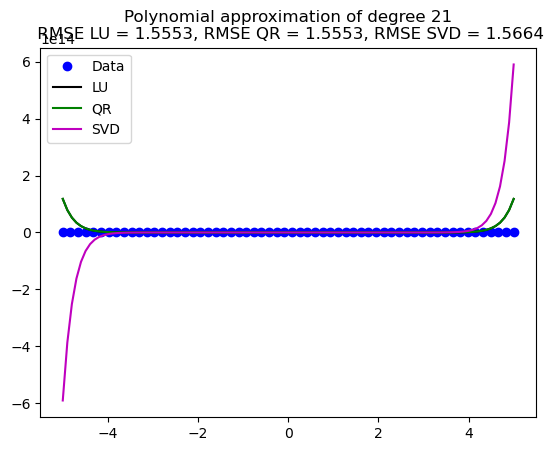

In [10]:
# Loop through the degrees
for n in degrees:
    # Calculate the polynomial coefficients
    coeffs_LU = polyfit_LU(x, y, n)
    coeffs_QR = polyfit_QR(x, y, n)
    coeffs_SVD = polyfit_SVD(x, y, n)
    # Calculate the RMSE
    rmse_LU = calculate_error(x, y, coeffs_LU)
    rmse_QR = calculate_error(x, y, coeffs_QR)
    rmse_SVD = calculate_error(x, y, coeffs_SVD)
    # Plot the data points and the polynomial curve
    plt.figure()
    plt.plot(x, y, 'bo', label='Data')
    xp = np.linspace(x.min(), x.max(), 100)
    plt.plot(xp, np.polyval(coeffs_LU, xp), 'k-', label='LU')
    plt.plot(xp, np.polyval(coeffs_QR, xp), 'g-', label='QR')
    plt.plot(xp, np.polyval(coeffs_SVD, xp), 'm-', label='SVD')
    plt.legend()
    plt.title('Polynomial approximation of degree %d\n RMSE LU = %.4f, RMSE QR = %.4f, RMSE SVD = %.4f' % (n, rmse_LU, rmse_QR, rmse_SVD))

    plt.show()

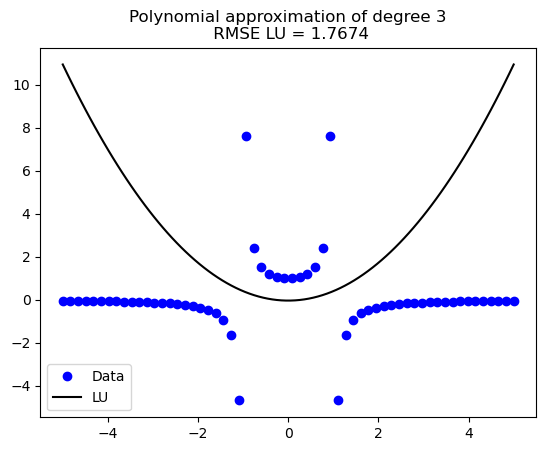

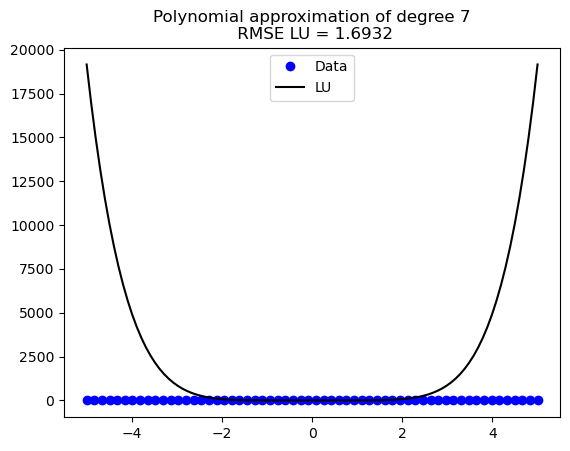

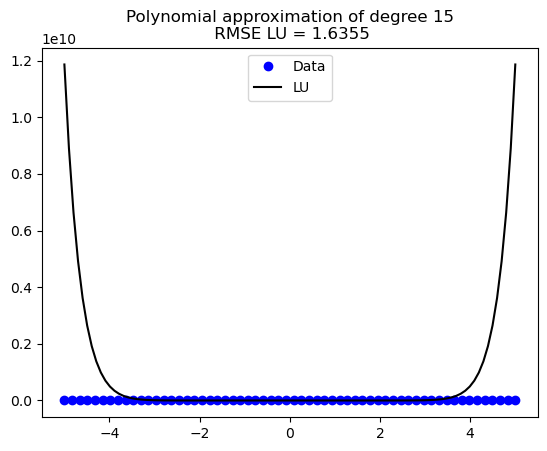

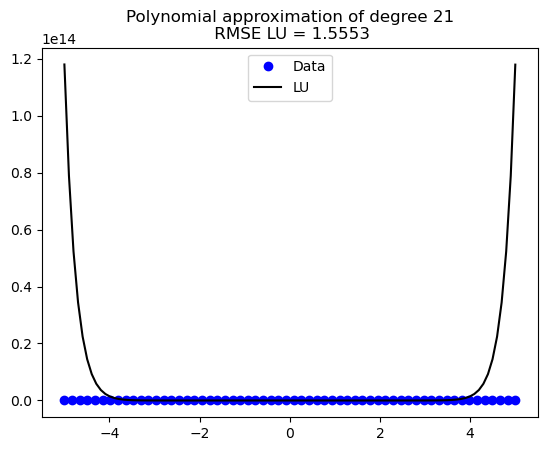

In [11]:
# Loop through the degrees
for n in degrees:
    # Calculate the polynomial coefficients
    coeffs_LU = polyfit_LU(x, y, n)
    # Calculate the RMSE
    rmse_LU = calculate_error(x, y, coeffs_LU)
    # Plot the data points and the polynomial curve
    plt.figure()
    plt.plot(x, y, 'bo', label='Data')
    xp = np.linspace(x.min(), x.max(), 100)
    plt.plot(xp, np.polyval(coeffs_LU, xp), 'k-', label='LU')
    plt.legend()
    plt.title('Polynomial approximation of degree %d\n RMSE LU = %.4f' % (n, rmse_LU))

    plt.show()